In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


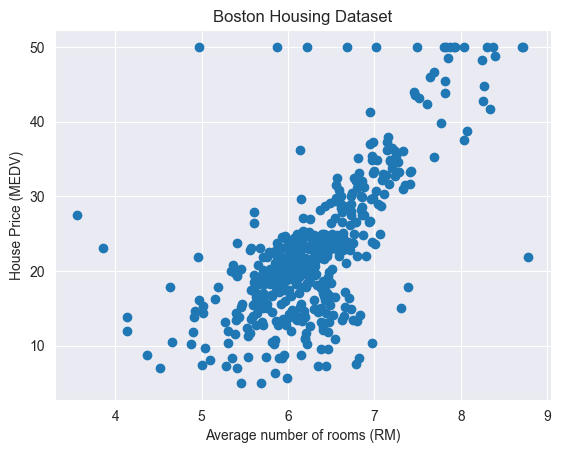

In [3]:
data_url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.data"

# Load dataset (Boston Housing)
columns = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
    'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
]

housing = pd.read_csv(data_url, sep=r'\s+', names=columns)

# Use only one input feature: RM (average rooms)
X = housing['RM'].values.reshape(-1, 1) # shape (m, 1)
y = housing['MEDV'].values.reshape(-1, 1) # shape (m, 1); MEDV is in $1000s

plt.scatter(X, y)
plt.xlabel("Average number of rooms (RM)")
plt.ylabel("House Price (MEDV)")
plt.title("Boston Housing Dataset")
plt.show()

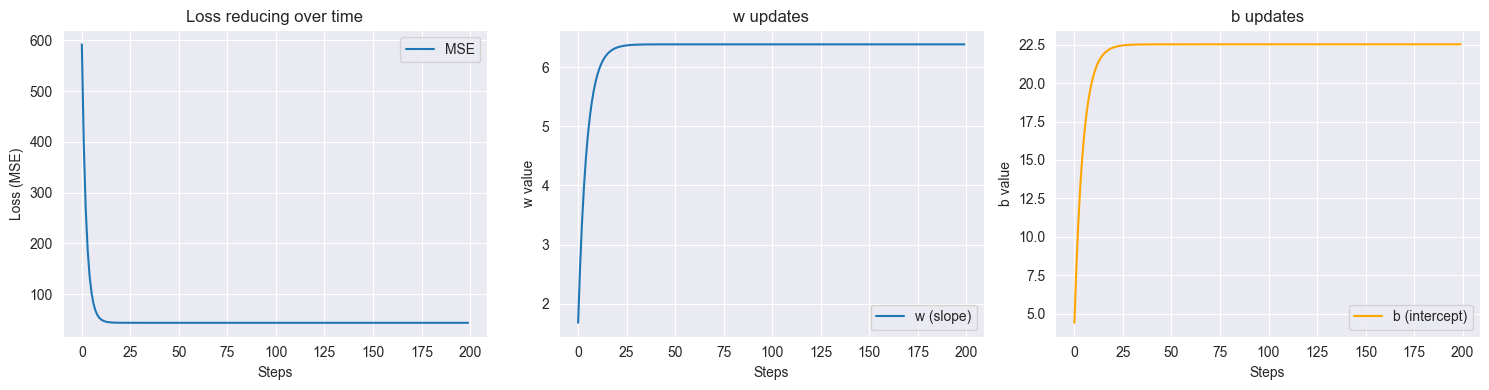

In [4]:
X_mean, X_std = X.mean(), X.std()
Xn = (X- X_mean)/X_std
x = Xn.flatten()
m = len(x)

np.random.seed(42)
w = np.random.randn()
b = np.random.randn()

eta = 0.1
steps = 200

w_log, b_log, loss_log = [], [], []

for t in range(steps):
    y_hat = w * x + b
    residuals = y_hat - y.flatten()

    dw = (2/m) * np.dot(residuals, x)
    db = (2/m) * residuals.sum()

    w = w- eta * dw
    b = b- eta * db

    j = (residuals**2).mean()

    w_log.append(w)
    b_log.append(b)
    loss_log.append(j)

plt.figure(figsize=(15,4))

# Loss curve
plt.subplot(1,3,1)
plt.plot(loss_log, label="MSE")
plt.xlabel("Steps")
plt.ylabel("Loss (MSE)")
plt.title("Loss reducing over time")
plt.legend()

# w trajectory
plt.subplot(1,3,2)
plt.plot(w_log, label="w (slope)")
plt.xlabel("Steps")
plt.ylabel("w value")
plt.title("w updates")
plt.legend()

# b trajectory
plt.subplot(1,3,3)
plt.plot(b_log, label="b (intercept)", color="orange")
plt.xlabel("Steps")
plt.ylabel("b value")
plt.title("b updates")
plt.legend()

plt.tight_layout()
plt.show()

In [5]:
import numpy as np

# Seed 42
np.random.seed(42)
w_42 = np.random.randn()
b_42 = np.random.randn()
print("Seed 42:", w_42, b_42)

# Seed 0
np.random.seed(0)
w_0 = np.random.randn()
b_0 = np.random.randn()
print("Seed 0:", w_0, b_0)

# Seed 123
np.random.seed(123)
w_123 = np.random.randn()
b_123 = np.random.randn()
print("Seed 123:", w_123, b_123)


Seed 42: 0.4967141530112327 -0.13826430117118466
Seed 0: 1.764052345967664 0.4001572083672233
Seed 123: -1.0856306033005612 0.9973454465835858


In [6]:
print(w)
print(b)

6.388975221817342
22.532806324110666


In [7]:
Y_pred = (w * x+b).reshape(-1, 1)

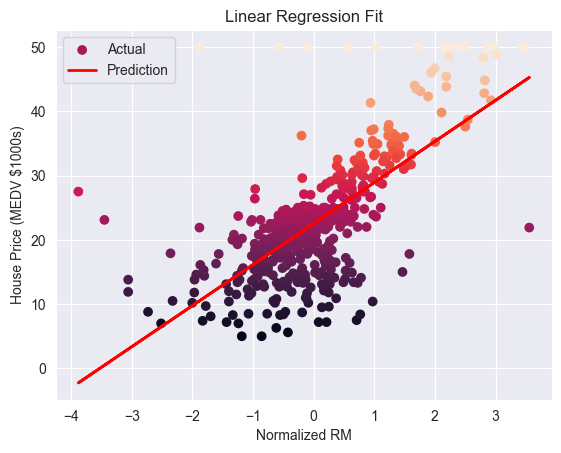

In [8]:
plt.scatter(x, y, label='Actual', c=y)
plt.plot(x, Y_pred, linewidth=2, label='Prediction', color='red')
plt.legend()
plt.xlabel('Normalized RM')
plt.ylabel('House Price (MEDV $1000s)')
plt.title('Linear Regression Fit')
plt.show()

In [9]:
mae = mean_absolute_error(y, Y_pred)
mae

4.447772901532233

In [10]:
mse = mean_squared_error(y, Y_pred)
mse

43.60055177116957

In [11]:
rmse = np.sqrt(mse)
rmse

np.float64(6.603071389222562)

In [12]:
r2 = r2_score(y, Y_pred)
r2

0.4835254559913341

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [14]:
data_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.data'
columns = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
    'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
]
housing = pd.read_csv(data_url, sep=r'\s+', names=columns)

X = housing.drop('MEDV', axis=1)
y = housing['MEDV']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
len(X_train), len(X_test)

(404, 102)

In [17]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307.0,21.0,390.95,11.28


In [18]:
y_train

477    12.0
15     19.9
332    19.4
423    13.4
19     18.2
       ... 
106    19.5
270    21.1
348    24.5
435    13.4
102    18.6
Name: MEDV, Length: 404, dtype: float64

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:
y_pred = model.predict(X_test)

In [21]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print('Model Performance on Test Data')
print(f'MAE: {mae:.3f}')
print(f'MSE: {mse:.3f}')
print(f'RMSE: {rmse:.3f}')
print(f'R²: {r2:.3f}')

Model Performance on Test Data
MAE: 3.189
MSE: 24.291
RMSE: 4.929
R²: 0.669


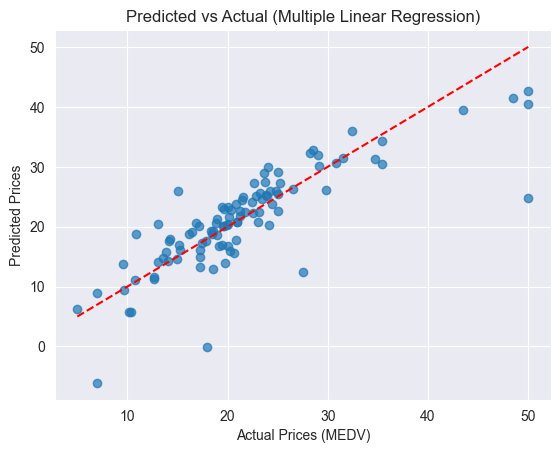

In [22]:
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Prices (MEDV)')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual (Multiple Linear Regression)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],color='red', linestyle='--')
plt.show()